In [1]:
import importlib
cim_profile = 'rc4_2021'
cim = importlib.import_module('cimgraph.data_profile.' + cim_profile)
sparql = importlib.import_module('cimgraph.loaders.sparql.' + cim_profile)

In [2]:
from cimgraph.loaders import Parameter, ConnectionParameters
from cimgraph.loaders.blazegraph.blazegraph import BlazegraphConnection
from cimgraph.loaders.gridappsd import GridappsdConnection, get_topology_response
from cimgraph.models import FeederModel
import json
import time

In [3]:
# Blazegraph connection for running outside the container
params = ConnectionParameters([Parameter(key="url", value="http://localhost:8889/bigdata/namespace/kb/sparql")])
bg = BlazegraphConnection(params, 'rc4_2021')


In [7]:
#feeder_mrid = "_C1C3E687-6FFD-C753-582B-632A27E28507"  # 123 bus
# feeder_mrid = "_49AD8E07-3BF9-A4E2-CB8F-C3722F837B62"  # 13 bus
# feeder_mrid = "_5B816B93-7A5F-B64C-8460-47C17D6E4B0F" # 13 bus asets
feeder_mrid = "_4F76A5F9-271D-9EB8-5E31-AA362D86F2C3"  # 8500 node
#feeder_mrid = "_67AB291F-DCCD-31B7-B499-338206B9828F" # J1
#feeder_mrid = "_9CE150A8-8CC5-A0F9-B67E-BBD8C79D3095"  # R2 12.47 3
#feeder_mrid = "_EE71F6C9-56F0-4167-A14E-7F4C71F10EAA" #9500 node

## Create Distributed CIM Model:

In [8]:
feeder = cim.Feeder(mRID=feeder_mrid)

In [9]:
start = time.perf_counter()
network = FeederModel(connection=bg, feeder=feeder, distributed=True, cim_profile = 'rc4_2021')
build_time = time.perf_counter() - start
print(build_time)

43.10235317889601


In [10]:
len(network.switch_areas)

38

In [11]:
network.switch_areas[1].get_all_edges(cim.ACLineSegment)
network.switch_areas[1].pprint(cim.ACLineSegment)

{'_3019F87E-6911-4371-BAA6-7D62CB70AC62': {'ACLineSegmentPhases': ['_1C967678-7759-45B0-A627-86F034AB1B22',
                                                                   '_34DDD614-7369-4FBE-9DA2-1FE97DD4A524',
                                                                   '_784DC55C-C8F3-4CBD-9398-703447A39374'],
                                           'BaseVoltage': '_4F1295B7-43F0-4D9F-A677-3C8B6488B2AD',
                                           'EquipmentContainer': '_4F76A5F9-271D-9EB8-5E31-AA362D86F2C3',
                                           'Location': '_6F48F7DC-7AA9-40EF-9DB9-359682CB238C',
                                           'Measurements': ['_59d25f7a-3c27-4ac6-9680-3596e1bdbefd',
                                                            '_636da9a8-2d2e-4b98-85c5-51c486cbb839',
                                                            '_a9721bdb-3ea3-42cf-aa16-75d788bc45a5'],
                                           'PerLengthImpedance': '_D36

In [9]:
network.graph[cim.PowerTransformer]

{'_1E6B5C97-C4E8-4CED-B9A5-6E69F389DA93': PowerTransformer(mRID='_1E6B5C97-C4E8-4CED-B9A5-6E69F389DA93', aliasName=None, description=None, name='xfm1', Names=[], AssetDatasheet=None, Assets=[], ConfigurationEvent=[], Controls=[], Location=Location(mRID='_6D30F773-D772-465C-9A4C-41624B283C2C', aliasName=None, description=None, name=None, Names=[], direction=None, geoInfoReference=None, type=None, Assets=[], ConfigurationEvents=[], CoordinateSystem=None, Crew=[], electronicAddress=None, EnvironmentalLocationKind=[], Fault=[], Hazards=[], mainAddress=None, Measurements=[], phone1=None, phone2=None, PositionPoints=[], PowerSystemResources=[], secondaryAddress=None, status=None), Measurements=[Analog(mRID='_5500424b-9931-4f09-a22b-d24a47517920', aliasName=None, description=None, name=None, Names=[], measurementType=None, phases=None, Asset=None, Locations=[], PowerSystemResource=None, Procedures=[], Terminal=None, maxValue=None, minValue=None, normalValue=None, positiveFlowIn=None, AnalogVa

In [10]:
cim.Terminal().ConductingEquipment

In [11]:
try:
    getattr(node, "nodes")
    print('yes')
except:
    setattr(node, "nodes", 2)
    print(getattr(node, "nodes"))

2


In [12]:
if None:
    print('yes')
else:
    print('no')

no


In [13]:
start = time.perf_counter()
network.get_all_edges(cim.ACLineSegment)
build_time = time.perf_counter() - start
print(build_time)


8.358480408787727e-05


In [14]:
# topology_response = get_topology_response(feeder_mrid)
topo = open("topo_message.json", "r")
topology_response = json.loads(topo.read())

In [15]:
network = DistributedModel(connection=bg, feeder=feeder, topology=topology_response['feeders'])

NameError: name 'DistributedModel' is not defined

In [ ]:
network.get_all_edges(cim.ACLineSegment)

In [ ]:
json.loads(network.__dumps__(cim.ACLineSegment))

## Example 1: Get Line Phase and Bus

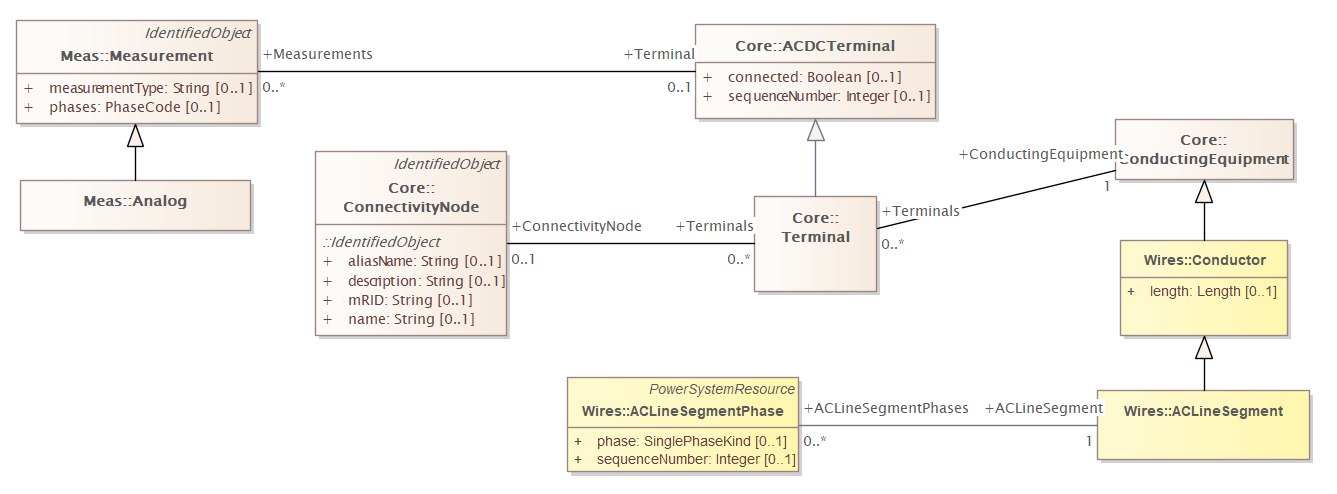

In [ ]:
network.typed_catalog.keys()

In [ ]:
network_area = network.switch_areas[0]

In [ ]:
network_area.get_all_attributes(cim.ACLineSegment)
network_area.get_all_attributes(cim.ACLineSegmentPhase)
network_area.get_all_attributes(cim.Terminal)
network_area.get_all_attributes(cim.Analog)

In [ ]:
for line in network_area.typed_catalog[cim.ACLineSegment].values():
    print('\n line mrid: ',line.mRID)
    print('line name:', line.name)
    print('bus 1: ', line.Terminals[0].ConnectivityNode.name)
    print('bus 2: ', line.Terminals[1].ConnectivityNode.name)

    for line_phs in line.ACLineSegmentPhases:
        print('phase:', line_phs.phase, ', sequence:', line_phs.sequenceNumber)

    for meas in line.Measurements:
        print('Measurement: ', meas.name,  ', type:', meas.measurementType, ', phases:', meas.phases)

## Example 2: Get all line impedance and asset info

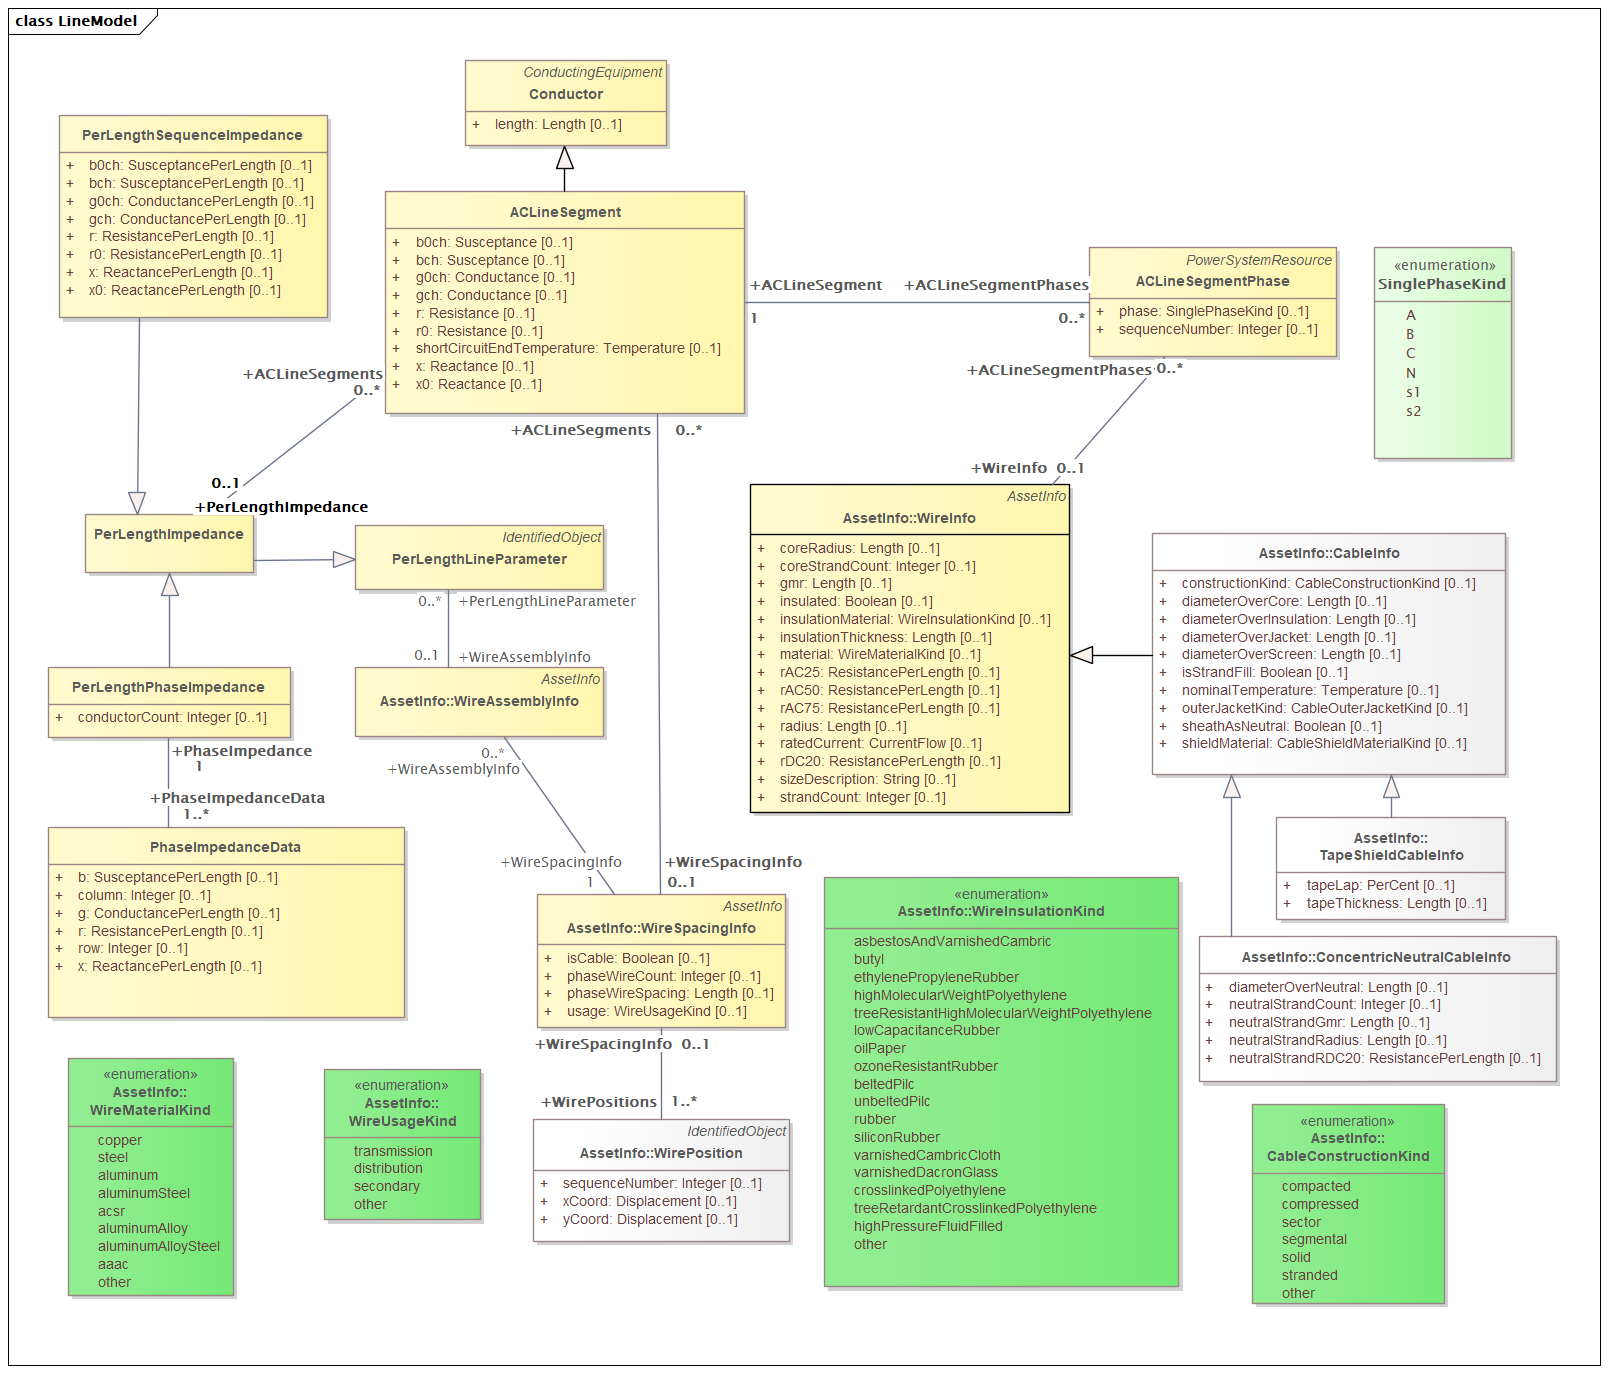

In [ ]:
network_area.get_all_attributes(cim.ACLineSegment)
network_area.get_all_attributes(cim.ACLineSegmentPhase)
network_area.get_all_attributes(cim.PerLengthPhaseImpedance)
network_area.get_all_attributes(cim.PhaseImpedanceData)
network_area.get_all_attributes(cim.WireSpacingInfo)
network_area.get_all_attributes(cim.WirePosition)
network_area.get_all_attributes(cim.OverheadWireInfo)
network_area.get_all_attributes(cim.ConcentricNeutralCableInfo)
network_area.get_all_attributes(cim.TapeShieldCableInfo)
network_area.get_all_attributes(cim.Terminal)

### Example 2.1: Parse by PSR:

In [ ]:
for line in network_area.typed_catalog[cim.ACLineSegment].values():
    print('\n line mrid: ', line.mRID)
    print('line name:', line.name)

    for line_phs in line.ACLineSegmentPhases:
        print('phase ', line_phs.phase, ': ', line_phs.mRID)
        if line_phs.WireInfo is not None:
            print('type: ', line_phs.WireInfo.__class__.__name__)
            print('gmr: ', line_phs.WireInfo.gmr)
            print('insulated: ', line_phs.WireInfo.insulated)

    if line.WireSpacingInfo is not None:
        for position in line.WireSpacingInfo.WirePositions:
            print('seq:', position.sequenceNumber, ' x:', position.xCoord, ' y:', position.yCoord)    

    if line.PerLengthImpedance is not None:
        for data in line.PerLengthImpedance.PhaseImpedanceData:
            print('row:', data.row, 'col:', data.column, 'r:', data.r, 'x:', data.x, 'b:', data.b)

### Example 2.2: Parse by Asset

In [ ]:
for impedance in network_area.typed_catalog[cim.PerLengthPhaseImpedance].values():
    print('\n name:', impedance.name)
    for data in impedance.PhaseImpedanceData:
            print('row:', data.row, 'col:', data.column, 'r:', data.r, 'x:', data.x, 'b:', data.b)
    for line in impedance.ACLineSegments:
        node1 = line.Terminals[0].ConnectivityNode
        node2 = line.Terminals[1].ConnectivityNode
        print('Line: ', line.name)
        print('Buses:', node1.name, node2.name)

In [ ]:
for cable in network_area.typed_catalog[cim.ConcentricNeutralCableInfo].values():
    print('name: ', cable.name)
    print('gmr: ', cable.gmr)
    print('insulated:', cable.insulated)
    print('diameter over jacket', cable.diameterOverJacket)
    print('diameter over neutral', cable.diameterOverNeutral)
    for line_phs in cable.ACLineSegmentPhases:
        print('\n Line:', line_phs.ACLineSegment.name)
        node1 = line_phs.ACLineSegment.Terminals[0].ConnectivityNode
        node2 = line_phs.ACLineSegment.Terminals[1].ConnectivityNode
        print('Line Phase:', line_phs.phase)
        print('Buses:', node1.name, node2.name)
        

## Get Asset Info for TransformerTank

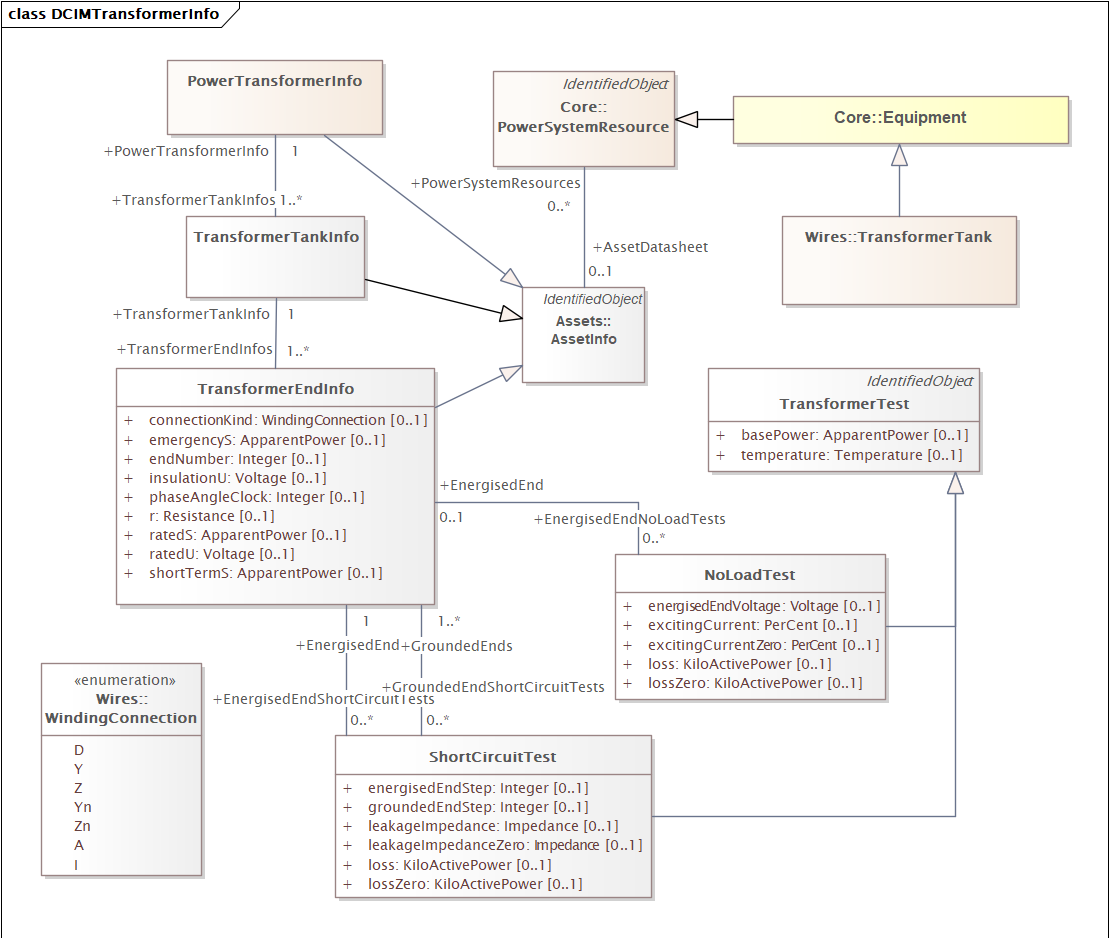

In [ ]:
network.get_all_attributes(cim.TransformerTank)
network.get_all_attributes(cim.TransformerTankEnd)
network.get_all_attributes(cim.TransformerTankInfo)
network.get_all_attributes(cim.TransformerEndInfo)
network.get_all_attributes(cim.ShortCircuitTest)
network.get_all_attributes(cim.NoLoadTest)
network.get_all_attributes(cim.Terminal)

In [ ]:
for tank in network.typed_catalog[cim.TransformerTank].values():
    print('\n name:', tank.name)
    for end in tank.TransformerTankEnds:
        print('end number:', end.endNumber)
        node = end.Terminal.ConnectivityNode
        print('bus: ', node.name)        
    
    for end_info in tank.TransformerTankInfo.TransformerEndInfos:
        
        print('end number', end_info.endNumber)
        print('rated voltage:', end_info.ratedU)
        print('resistance:', end_info.r)
        for no_load_test in end_info.EnergisedEndNoLoadTests:
            print('exciting current:', no_load_test.excitingCurrent)

        for short_circuit_test in end_info.EnergisedEndShortCircuitTests:
            print('energisedEndStep:', short_circuit_test.energisedEndStep)
            print('groundedEndStep:', short_circuit_test.groundedEndStep)
            print('leakageImpedance:', short_circuit_test.leakageImpedance)
            
        for short_circuit_test in end_info.GroundedEndShortCircuitTests:
            print('energisedEndStep:', short_circuit_test.energisedEndStep)
            print('groundedEndStep:', short_circuit_test.groundedEndStep)
            print('leakageImpedance:', short_circuit_test.leakageImpedance)
        

## Get PowerElectronicsConnection Inverters

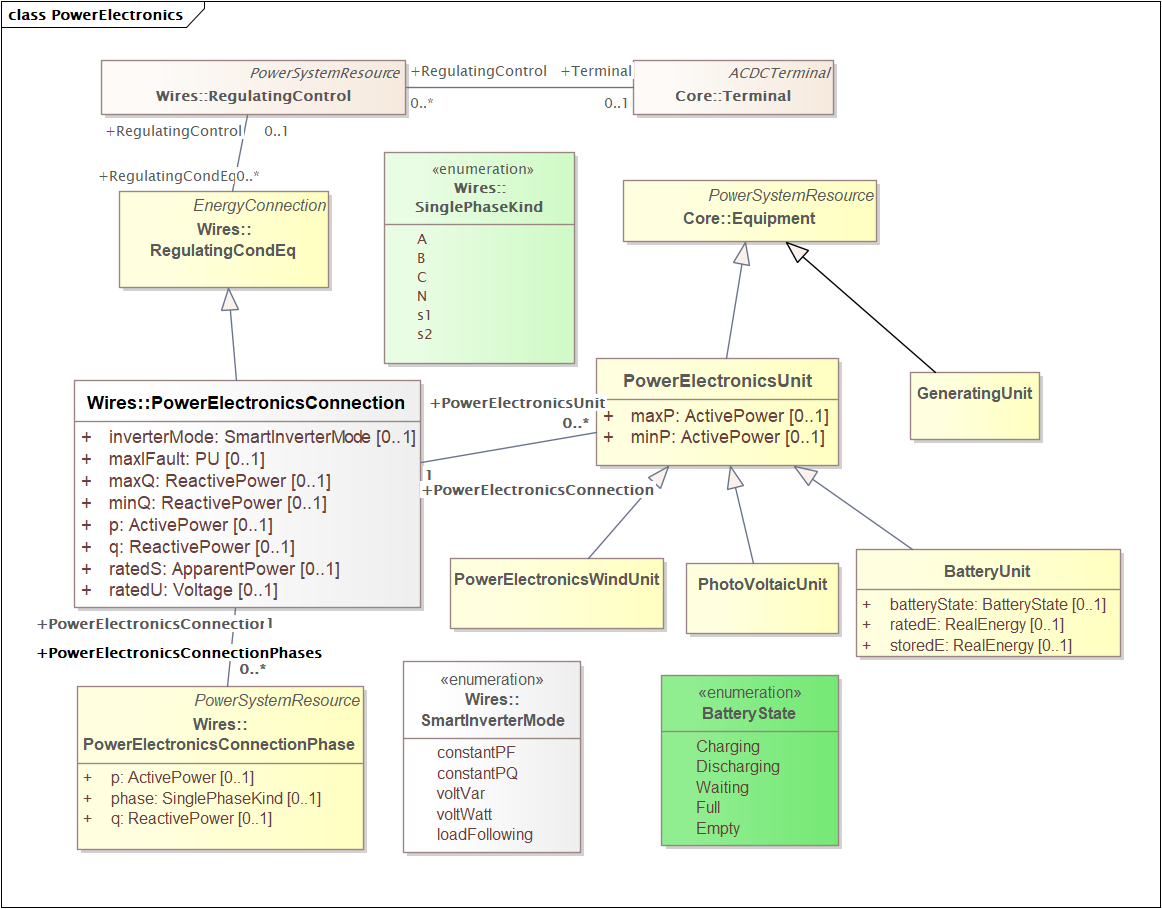

In [ ]:
secondary_area = network.switch_areas[3].secondary_areas[0]
secondary_area.get_all_attributes(cim.PowerElectronicsConnection)
secondary_area.get_all_attributes(cim.PowerElectronicsConnectionPhase)
secondary_area.get_all_attributes(cim.BatteryUnit)
secondary_area.get_all_attributes(cim.PhotovoltaicUnit)
secondary_area.get_all_attributes(cim.Terminal)

pec_ids = list()

for pec in secondary_area.typed_catalog[cim.PowerElectronicsConnection].values():
    print('\n name: ', pec.name)
    print('p = ', pec.p, ', q = ', pec.q)
    for pec_phs in pec.PowerElectronicsConnectionPhases:
        print('phase ', pec_phs.phase, ':  p=', pec_phs.p, ', q=', pec_phs.q)
    
    for pec_unit in pec.PowerElectronicsUnit:
        print(pec_unit.__class__.__name__)
        if pec_unit.__class__ is cim.BatteryUnit:
            print('Stored E:', pec_unit.storedE)

In [ ]:
print(network.switch_areas[2].get_attributes_query(cim.LinearShuntCompensator))

In [ ]:
import re

In [ ]:
network.get_all_attributes(cim.LoadBreakSwitch)
network.typed_catalog[cim.SwitchPhase]

In [ ]:
(network.get_all_attributes(cim.ConnectivityNode))

In [ ]:
json.loads(network.__dumps__(cim.ConnectivityNode))

In [ ]:
cim_class = cim.ACLineSegment
attribute = 'r'
attribute_type = cim_class.__dataclass_fields__[attribute].type
print(attribute_type)

In [ ]:
if '\'' in attribute_type: #handling inconsistent '' marks in data profile
    at_cls = re.match(r'\[\'(.*)\']',attribute_type)
    attribute_class = at_cls.group(1)
else:        
    at_cls = re.match(r'\[(.*)]',attribute_type)
    attribute_class = at_cls.group(1)

In [ ]:
at_cls = re.match(r'Optional\[(.*)]',attribute_type)

In [ ]:
attribute_type.split('[')

In [ ]:
print(network.get_attributes_query(cim.ACLineSegment))

In [ ]:
cim.ACLineSegment().Measurements

In [ ]:
issubclass(cim.Equipment, cim.ACLineSegment)